## Game of Thrones

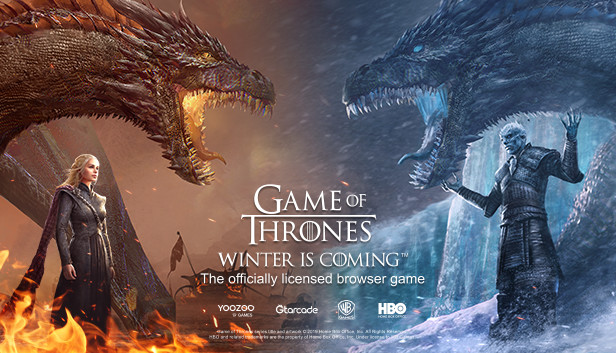

In [3]:
from IPython.display import Image
Image(filename='got.jpg', width=500, height=200)

### Introduction
This notebook will accomplish the following tasks:

### Exploratory Analysis
- Who fought the most battles with each other?
- Which king launched the most attacks?
- Which region had the most deaths and battles?
- Does having a larger army, mean you can win a battle?
- Which houses had the most deaths?
- Which gender has the most deaths?
- Which season had the most speaking?

In [108]:
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from tabulate import tabulate
from sklearn.preprocessing import OneHotEncoder
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from collections import Counter
import matplotlib.patches as mpatches
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
import plotly.express as px
import plotly.graph_objs as go

In [6]:
# Loading in battles dataset.
battles = pd.read_csv('battles.csv')
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [13]:
# Some missing values in the dataset.
# For our analysis,, it may be better to not drop any rows of data.
battles.describe(include='all')

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
count,38,38.000000,38.000000,36,35,38,10,3,2,37,2,0.0,0.0,37,37,37.000000,37.000000,24.000000,19.000000,37,28,37.000000,37,38,5
unique,38,NaN,NaN,4,6,11,7,2,1,12,2,NaN,NaN,2,4,NaN,NaN,NaN,NaN,31,28,NaN,27,7,5
top,The Red Wedding,NaN,NaN,Joffrey/Tommen Baratheon,Robb Stark,Stark,Tully,Mormont,Glover,Lannister,Frey,NaN,NaN,win,pitched battle,NaN,NaN,NaN,NaN,Gregor Clegane,"Renly Baratheon, Cortnay Penrose, Loras Tyrell...",NaN,Riverrun,The Riverlands,Since House Bolton betrays the Starks for Hous...
freq,1,NaN,NaN,14,14,8,3,2,2,9,1,NaN,NaN,32,14,NaN,NaN,NaN,NaN,4,1,NaN,3,17,1
mean,NaN,299.105263,19.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,NaN,NaN,0.702703,NaN,NaN,NaN
std,NaN,0.689280,11.113055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,NaN,NaN,0.463373,NaN,NaN,NaN
min,NaN,298.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,20.000000,100.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,299.000000,10.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,299.000000,19.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,300.000000,28.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,NaN,NaN,1.000000,NaN,NaN,NaN


In [8]:
# Loading in character deaths dataset.
character_deaths = pd.read_csv('character-deaths.csv')
character_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [14]:
# Similar to the battles dataset. We have some missing values in the character_deaths dataset.
# For our analysis,, it may be better to not drop any rows of data.
character_deaths.describe(include='all')

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
count,917,917,305.000000,307.000000,299.000000,905.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
unique,916,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Myles,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,299.157377,2.928339,40.070234,28.861878,0.828790,0.468920,0.272628,0.353326,0.424209,0.272628,0.284624
std,NaN,NaN,0.703483,1.326482,20.470270,20.165788,0.376898,0.499305,0.445554,0.478264,0.494492,0.445554,0.451481
min,NaN,NaN,297.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,299.000000,2.000000,25.500000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,299.000000,3.000000,39.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,300.000000,4.000000,57.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Loading in character predictions dataset.
character_predictions = pd.read_csv('character-predictions.csv')
character_predictions.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [15]:
# Similar to the battles and character predictions dataset. We have some missing values in the character_predictions dataset.
# For our analysis, it may be better to not drop any rows of data.
character_predictions.describe(include='all')

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946,938,1946.000000,677,433.000000,444.000000,21,26,23,1519,276,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,21.000000,26.000000,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
unique,NaN,NaN,NaN,NaN,NaN,1946,262,NaN,64,NaN,NaN,17,20,22,347,254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Dalla,Ser,NaN,Northmen,NaN,NaN,Alyssa Velaryon,Quellon Greyjoy,Jaehaerys Targaryen,Night's Watch,Walder Frey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,1,384,NaN,124,NaN,NaN,2,2,2,105,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,973.500000,0.745632,0.687050,0.634470,0.365530,NaN,NaN,0.619219,NaN,1577.364896,2950.193694,NaN,NaN,NaN,NaN,NaN,0.198356,0.374615,0.480473,0.591984,0.395170,0.714286,0.192308,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,NaN,NaN,0.485704,NaN,19565.414460,28192.245529,NaN,NaN,NaN,NaN,NaN,0.398864,0.484148,0.499747,0.491593,0.489013,0.462910,0.401918,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,-28.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,NaN,NaN,0.000000,NaN,240.000000,282.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,NaN,NaN,1.000000,NaN,268.000000,299.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,NaN,NaN,1.000000,NaN,285.000000,299.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000


### Section 01: Exploratory Data Analysis

#### Who fought the most battles with each other?
- We can that Stannis Baratheon and Balon/Euron Greyjoy fought the most battles with each other.

In [17]:
# Please note that we're ignoring records where either attacker_king or defender_king is null. 
# We're also ignoring one record where both have the same value.

c = list(Counter([tuple(set(x)) for x in battles.dropna(subset = ["attacker_king", "defender_king"])[["attacker_king", "defender_king"]].values if len(set(x)) > 1]).items())

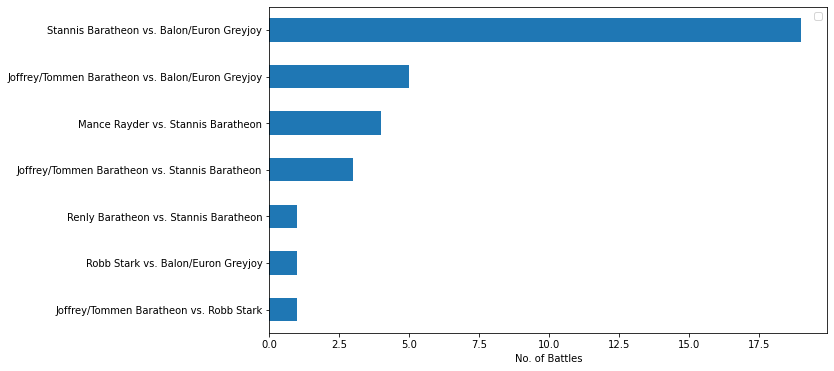

In [18]:
p = pd.DataFrame(c).sort_values(1).plot.barh(figsize = (10, 6))
_ = p.set(yticklabels = ["%s vs. %s" % (x[0], x[1]) for x in list(zip(*c))[0]], xlabel = "No. of Battles"), p.legend("")

#### Which king launched the most attacks?
- Joffrey/Tommen Baratheon launched the most attacks.

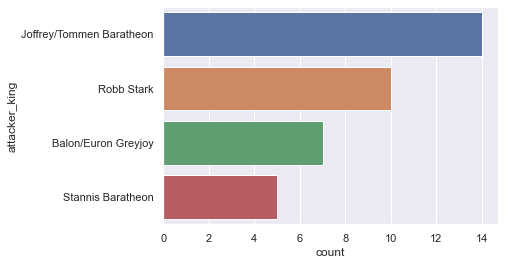

In [132]:
sns.countplot(y=battles.attacker_king)
sns.set(rc={'figure.figsize':(6,4)})

#### Which region had the most deaths and battles?
- The Riverlands had the most battles and the most deaths.

In [21]:
data = battles.groupby("region").sum()[["major_death", "major_capture"]]

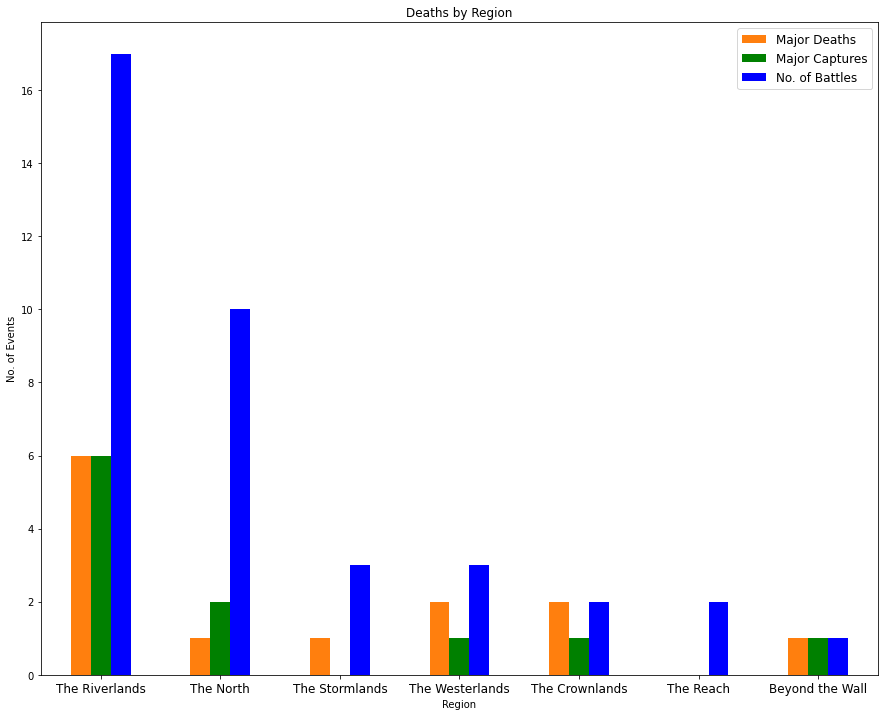

In [50]:
p = pd.concat([data, battles.region.value_counts().to_frame()], axis = 1).sort_values("region", ascending = False).copy(deep = True).plot.bar(color = [sns.color_palette()[1], "green", "blue"], rot = 0)
_ = p.set(xlabel = "Region", ylabel = "No. of Events"), p.legend(["Major Deaths", "Major Captures", "No. of Battles"], fontsize = 12.)
p = plt.rcParams["figure.figsize"] = (15,12)
plt.title('Deaths by Region')
plt.rc('xtick',labelsize=12)

#### Does having a larger army, mean you can win a battle?
- Difficult to say since in order to do this particular analysis I had to remove NaN values from the attacker_size field in the battles csv file. This decreased the number of records from 37 to 16. 

In [55]:
data = battles.dropna(subset = ["attacker_size", "defender_size"]).copy(deep = True)

In [ ]:
data = pd.concat([(data.attacker_size - data.defender_size).to_frame(), battles[["attacker_outcome"]]], axis = 1, join = "inner")
data = data[data[0] != 0]

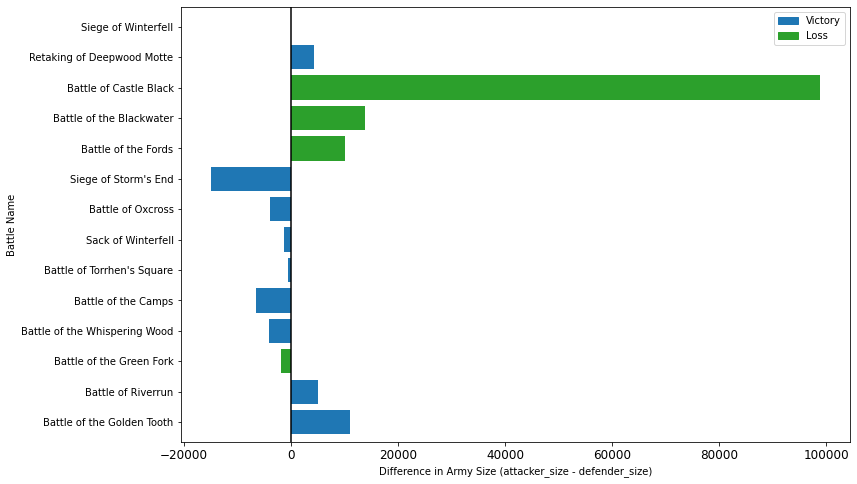

In [59]:
p = data[0].plot.barh(figsize = (12, 8), width = .8, color = [sns.color_palette()[0] if x == "win" else sns.color_palette()[2] if x == "loss" else "white" for x in data.attacker_outcome.values])
_ = p.legend(handles = [mpatches.Patch(color = sns.color_palette()[0], label = "Victory", aa = True), mpatches.Patch(color = sns.color_palette()[2], label = "Loss", aa = True)])
_ = p.axvline(0, color = 'k'), p.set(yticklabels = battles.name.iloc[data.index].values, xlabel = "Difference in Army Size (attacker_size - defender_size)", ylabel = "Battle Name")

#### Which houses had the most deaths?
- The house of Stark had the most deaths followed by the house of Lannister.

In [80]:
character_deaths['Allegiances'] = character_deaths['Allegiances'].str.replace('House ', '')
deaths_by_houses = character_deaths.groupby('Allegiances').size()
deaths_by_houses.drop(['None', "Night's Watch", 'Wildling'], inplace=True)
deaths_by_houses = deaths_by_houses.reset_index(name='Deaths')
deaths_by_houses = deaths_by_houses.rename(columns = {'Allegiances': 'House'})
deaths_by_houses.sort_values(by='Deaths', ascending=False, na_position='first')

,House,Deaths
5,Stark,108
3,Lannister,102
2,Greyjoy,75
1,Baratheon,64
4,Martell,37
6,Targaryen,36
0,Arryn,30
7,Tully,30
8,Tyrell,26


#### Which gender has the most deaths?
- Males.

In [93]:
deaths_by_gender = character_deaths.groupby('Gender').size().reset_index(name='Deaths')
deaths_by_gender.Gender[deaths_by_gender.Gender == False] = 'Female'
deaths_by_gender.Gender[deaths_by_gender.Gender == True] = 'Male'
deaths_by_gender = deaths_by_gender.rename(columns = {'gender': 'Gender'})
deaths_by_gender.sort_values(by='Deaths', ascending=False, na_position='first')

<ipython-input-93-9049ee4921c8>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,Deaths
1,Male,760
0,Female,157


#### Which season had the most speaking?
- Season 2.
- After season 2, the amount of speaking began to decline.

In [102]:
# Loading in json files with the sentences that were spoken during each season of Game of Thrones.
season_1 = open('season_1.json', 'r')
season_2 = open('season_2.json', 'r')
season_3 = open('season_3.json', 'r')
season_4 = open('season_4.json', 'r')
season_5 = open('season_5.json', 'r')
season_6 = open('season_6.json', 'r')
season_7 = open('season_7.json', 'r')

In [103]:
seasons = [season_1, season_2, season_3, season_4, season_5, season_6, season_7]

In [104]:
# Here we can see the number of sentences that were spoken during each season.
length_season_dic = {}

for season in range(len(seasons)):
    i = season + 1
    name = 'Season ' + str(i)
    length_season_dic[name] = len(seasons[season].read())
    
length_season_dic

{'Season 1': 356350,
 'Season 2': 373440,
 'Season 3': 356623,
 'Season 4': 334226,
 'Season 5': 325414,
 'Season 6': 289476,
 'Season 7': 286495}